# IRIS FLOWER CLASSIFICATION

 Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.



In [4]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
#1. Importing Dataset

df = pd.read_csv('Iris.csv')

In [9]:
#Preview of data
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
135,136,7.7,3.0,6.1,2.3,Iris-virginica
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
16,17,5.4,3.9,1.3,0.4,Iris-setosa
116,117,6.5,3.0,5.5,1.8,Iris-virginica
60,61,5.0,2.0,3.5,1.0,Iris-versicolor
26,27,5.0,3.4,1.6,0.4,Iris-setosa
22,23,4.6,3.6,1.0,0.2,Iris-setosa
46,47,5.1,3.8,1.6,0.2,Iris-setosa
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# Size of Data
df.shape

(150, 6)

In [11]:
# Delete a  ID column

df.drop(columns=['Id'],inplace=True)
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
144,6.7,3.3,5.7,2.5,Iris-virginica
21,5.1,3.7,1.5,0.4,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
66,5.6,3.0,4.5,1.5,Iris-versicolor
137,6.4,3.1,5.5,1.8,Iris-virginica


In [13]:
# discription of data set
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
# Basic info about the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
# To display no. of samples  on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [16]:
# 2.Preprocessing the Dataset

In [17]:
# Check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [19]:
# 3. Exploratory Data Analysis

a. Univariate analysis

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


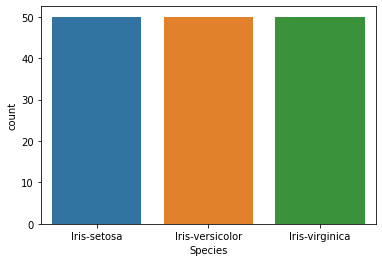

In [20]:
# On categorical data using countplot
sns.countplot(x=df['Species'])
print(df['Species'].value_counts())

<AxesSubplot:ylabel='Species'>

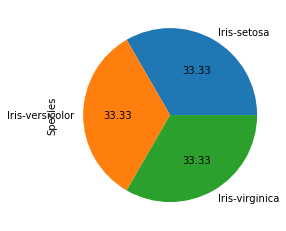

In [21]:
# On categorical data using piechart
df['Species'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Count'>

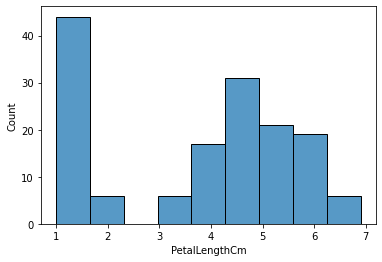

In [22]:
# On numerical data (PetalLengthCm) using histogram
sns.histplot(x=df['PetalLengthCm'])

<AxesSubplot:ylabel='Density'>

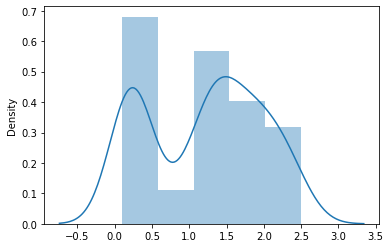

In [23]:
# On numerical data (PetalWidthCm) using distplot
sns.distplot(x= df['PetalWidthCm'])

<AxesSubplot:xlabel='SepalLengthCm'>

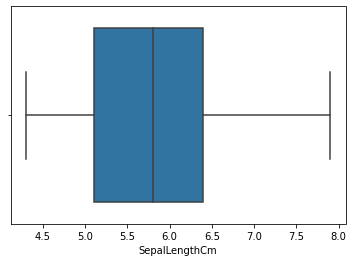

In [24]:
# On numerical data (SepalLengthCm) using boxplot 
sns.boxplot(x=df['SepalLengthCm'])

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Count'>

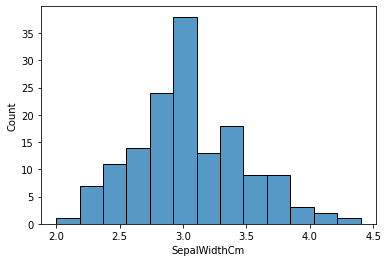

In [25]:
# On numerical data (SepalWidthCm) using histogram
sns.histplot(x=df['SepalWidthCm'])

In [26]:
# Minimum value
print('Minimum value of Petal Length in cm: ',df['PetalLengthCm'].min())
print('Minimum value of Petal Width in cm: ',df['PetalWidthCm'].min())
print('Minimum value of Sepal Length in cm: ',df['SepalLengthCm'].min())
print('Minimum value of Sepal Width in cm: ',df['SepalWidthCm'].min())

Minimum value of Petal Length in cm:  1.0
Minimum value of Petal Width in cm:  0.1
Minimum value of Sepal Length in cm:  4.3
Minimum value of Sepal Width in cm:  2.0


In [27]:
# Maximum value
print('Maximum value of Petal Length in cm: ',df['PetalLengthCm'].max())
print('Maximum value of Petal Width in cm: ',df['PetalWidthCm'].max())
print('Maximum value of Sepal Length in cm: ',df['SepalLengthCm'].max())
print('Maximum value of Sepal Width in cm: ',df['SepalWidthCm'].max())

Maximum value of Petal Length in cm:  6.9
Maximum value of Petal Width in cm:  2.5
Maximum value of Sepal Length in cm:  7.9
Maximum value of Sepal Width in cm:  4.4


In [28]:
# Mean value
print('Mean value of Petal Length in cm: ',df['PetalLengthCm'].mean())
print('Mean value of Petal Width in cm: ',df['PetalWidthCm'].mean())
print('Mean value of Sepal Length in cm: ',df['SepalLengthCm'].mean())
print('Mean value of Sepal Width in cm: ',df['SepalWidthCm'].mean())

Mean value of Petal Length in cm:  3.7586666666666693
Mean value of Petal Width in cm:  1.1986666666666672
Mean value of Sepal Length in cm:  5.843333333333335
Mean value of Sepal Width in cm:  3.0540000000000007


b. Multivariate Analysis


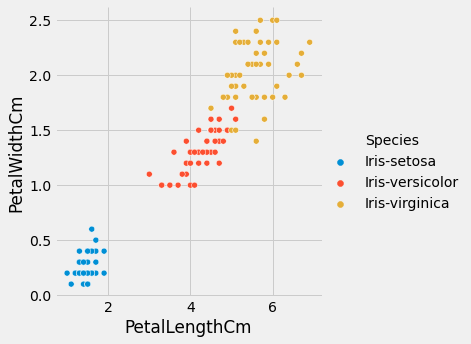

In [29]:
# Plot a scatter plot between PetalLengthCm and PetalWidthCm with hue parameter
plt.style.use('fivethirtyeight')
sns.relplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=df)

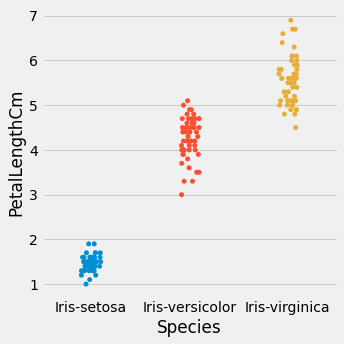

In [30]:
# Categorical Scatter plot between Species and PetalLengthCm (x-axis=> Categorical, y-axis=> Numerical)
sns.catplot(x='Species',y='PetalLengthCm',kind='strip',data=df)

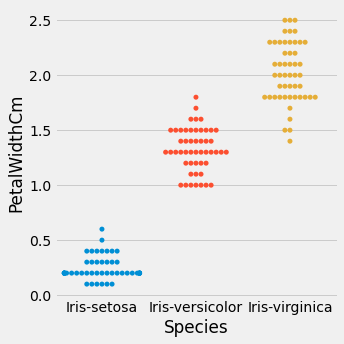

In [31]:
# Categorical Scatter plot between Species and PetalWidthCm (x-axis=> Categorical, y-axis=> Numerical)
sns.catplot(x='Species',y='PetalWidthCm',kind='swarm',data=df)

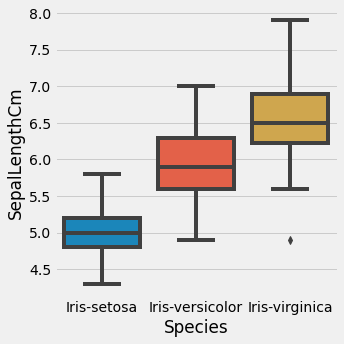

In [32]:
# Categorical Scatter plot between Species and SepalLengthCm (x-axis=> Categorical, y-axis=> Numerical)
sns.catplot(x='Species',y='SepalLengthCm',kind='box',data=df)

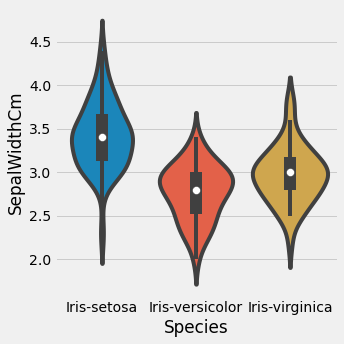

In [33]:
# Categorical Scatter plot between Species and SepalWidthCm (x-axis=> Categorical, y-axis=> Numerical)
sns.catplot(x='Species',y='SepalWidthCm',kind='violin',data=df)

In [34]:
#4. Correlation Matrix

A correlation matrix is a table sjowing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have high correlation, we can neglect one variable from those two.

In [35]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

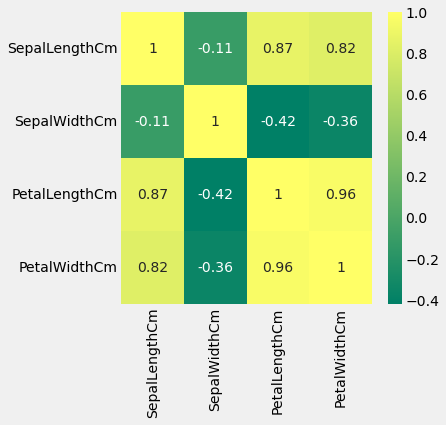

In [36]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True, ax=ax,cmap='summer')

In [37]:
# 5. Label Encoder

In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [38]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

df['Species'] = Le.fit_transform(df['Species'])
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
40,5.0,3.5,1.3,0.3,0
48,5.3,3.7,1.5,0.2,0
46,5.1,3.8,1.6,0.2,0
19,5.1,3.8,1.5,0.3,0
130,7.4,2.8,6.1,1.9,2


In [39]:
# 6. Model Training

In [40]:
# Out of 100% data we take 80% for training and 20% for testing
from sklearn.model_selection import train_test_split

x = df.drop(columns = ['Species'])
y = df['Species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

a. Logistic Regression

In [41]:
# Training the model through logistic Regression
from sklearn.linear_model import LogisticRegression
model_LoR = LogisticRegression()

model_LoR.fit(x_train, y_train)

LogisticRegression()

In [42]:
# Making Prediction
prediction1 = model_LoR.predict(x_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction1) *100)

96.66666666666667


b. Support Vector Machine

In [43]:
# Training the model through Support Vector Machine
from sklearn.svm import SVC
model_svc = SVC()

model_svc.fit(x_train,y_train)

SVC()

In [44]:
prediction3 = model_svc.predict(x_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction3) *100)

96.66666666666667


c. Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
model_DTC = DecisionTreeClassifier()

model_DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
prediction4 = model_DTC.predict(x_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction4) *100)

93.33333333333333


In [47]:
# 7. Detailed Classification Report

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.78      0.88         9
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



In [52]:
### 8. Testing the model by providing new data
x_new = np.array([[5, 2, 1, 0.20], [4.64, 2.2, 9.8, 1.1], [6.3, 2.5, 4.6, 1.9]])

# Prediciton of the species from the input vector
prediction = model_DTC.predict(x_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: [0 2 2]
